In [1]:
import pandas as pd
import datetime as dt
!pip install --upgrade pandas-datareader
from pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()
    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
ticker

Requirement already up-to-date: pandas-datareader in /Users/mike_stein612/opt/anaconda3/lib/python3.8/site-packages (0.9.0)


,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,BA,QCOM,KO,GOOG,SNE,PTR
Date,,,,,,,,,,,,,
2019-01-02,47.080002,101.120003,115.209999,47.860001,116.279999,39.480000,1539.130005,323.809998,57.400002,46.930000,1045.849976,48.720001,60.910000
2019-01-03,44.490002,97.400002,112.910004,46.389999,114.650002,35.547501,1500.280029,310.899994,55.700001,46.639999,1016.059998,47.020000,61.150002
2019-01-04,47.220001,101.930000,117.320000,49.220001,119.730003,37.064999,1575.390015,327.079987,56.599998,47.570000,1070.709961,49.209999,62.810001
2019-01-07,47.439999,102.059998,118.150002,49.480000,121.279999,36.982498,1629.510010,328.109985,56.439999,46.950001,1068.390015,49.720001,62.549999
2019-01-08,47.740002,102.800003,119.830002,49.330002,122.309998,37.687500,1656.579956,340.529999,55.950001,47.480000,1076.280029,49.889999,63.889999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,59.410000,157.380005,134.979996,54.459999,141.339996,71.067497,1789.209961,333.000000,88.769997,54.709999,1343.560059,67.760002,49.099998
2019-12-26,59.820000,158.669998,134.910004,54.810001,141.529999,72.477501,1868.770020,329.920013,88.400002,55.020000,1360.400024,68.019997,49.660000
2019-12-27,60.080002,158.960007,135.270004,54.930000,141.279999,72.449997,1869.800049,330.140015,88.800003,55.349998,1351.890015,67.779999,50.060001


In [2]:
first = ticker.iloc[0]
last = ticker.iloc[-1]

pct_change = (last - first) / first * 100
pct_change

INTC    27.124036
MSFT    55.953316
IBM     16.344062
BHP     14.312575
TM      20.863429
AAPL    85.948580
AMZN    20.057432
BA       0.602209
QCOM    53.710803
KO      17.941611
GOOG    27.840517
SNE     39.573067
PTR    -17.369887
dtype: float64

<BarContainer object of 13 artists>

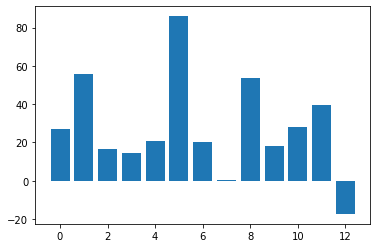

In [5]:
x = range(len(ticker_list))

plt.bar(x, height = pct_change)

In [7]:
pct_change = pct_change.sort_values()

<BarContainer object of 13 artists>

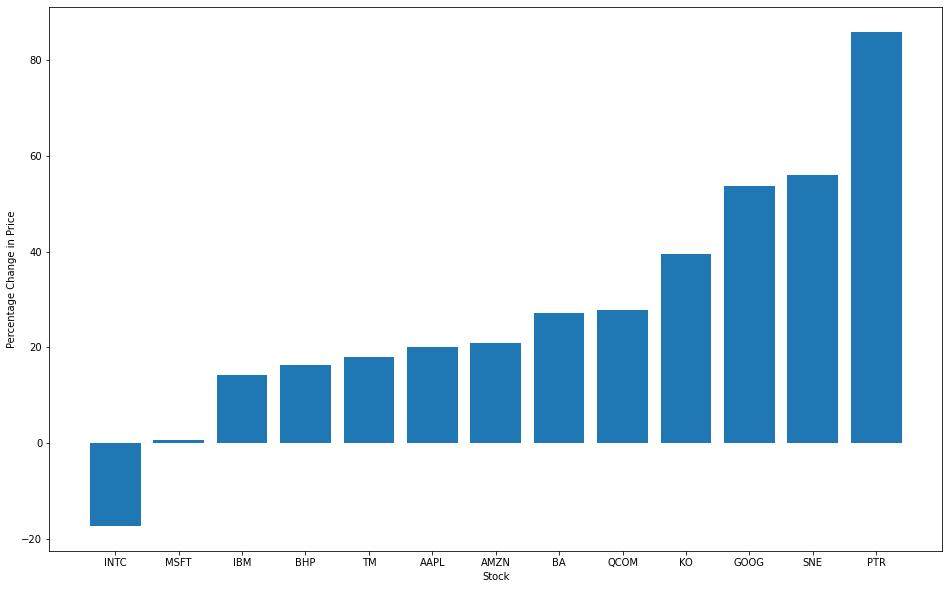

In [36]:
fig, ax = plt.subplots(figsize = (16, 10))
ax = plt.bar(x, height = pct_change)
plt.xlabel('Stock')
plt.ylabel('Percentage Change in Price')
p = list(range(13))
plt.xticks(p, ticker.columns)
ax

In [26]:
ticker.columns

Index(['INTC', 'MSFT', 'IBM', 'BHP', 'TM', 'AAPL', 'AMZN', 'BA', 'QCOM', 'KO',
       'GOOG', 'SNE', 'PTR'],
      dtype='object')